# Cellphone Price Range Prediction

## Data Information

The dataset about phone information.

The dataset Consist 20 features and one target features.
<ol>
<li>battery_power - Total energy a battery can store in one time measured in mAh
<li>blue - Has bluetooth or not
<li>clock_speed - speed at which microprocessor executes instructions
<li>dual_sim - Has dual sim support or not
<li>fc - Front Camera mega pixels
<li>four_g - Has 4G or not
<li>int_memory - Internal Memory in Gigabytes
<li>m_dep - Mobile Depth in cm
<li>mobile_wt - Weight of mobile phone
<li>n_cores - Number of cores of processor
<li>pc - Primary Camera mega pixels
<li>px_height - Pixel Resolution Height
<li>px_width - Pixel Resolution Width
<li>ram - Random Access Memory in Megabytes
<li>sc_h - Screen Height of mobile in cm
<li>sc_w - Screen Width of mobile in cm
<li>talk_time - longest time that a single battery charge will last when you are
<li>three_g - Has 3G or not
<li>touch_screen - Has touch screen or not
<li>wifi - Has wifi or not
<li>price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
</ol>

# Necessary Libaray

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [2]:
#Loading data using pandas
data=pd.read_csv("datasets_11167_15520_train.csv")

# Basic Checks

In [3]:
#Size of dataset
data.shape

(2000, 21)

In [4]:
#First five columns
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#Last five columns 
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
# Features of the data 
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# datatypes of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
## Checking null values in data.
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* No null values present in data

In [9]:
#checking state of data
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
## checking unique value of same  feature.
lable_data=['blue','dual_sim','fc','four_g','n_cores','three_g','touch_screen','wifi']
for i in lable_data:
        print(i,data[i].unique())

blue [0 1]
dual_sim [0 1]
fc [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g [0 1]
n_cores [2 3 5 6 1 8 4 7]
three_g [0 1]
touch_screen [0 1]
wifi [1 0]


### Insights/Obervation:-
<ol>
    <li>Shape of Data set is 2000 rows and 21 features.
    <li>No null value present in dataset.
    <li>No constant value present in dataset.
    <li>8 feature have lable data.
    <li>In fc feture most data have 0 mega pixel but it not possible that camera have 0 mega pixel.
    <li>In sc_w feture most data have 0 width but it not possible that screen have 0 width.   
</ol>

# Data Visualization

### Univariate Analysis

In [11]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

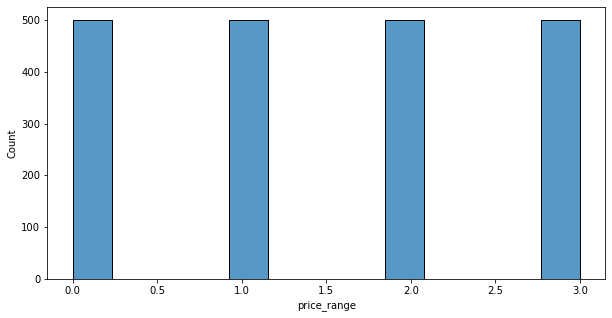

In [12]:
#Plot Target variable
plt.figure(figsize=(10,5))
sns.histplot(data['price_range'])
plt.show()

* seeing target variable graph we can say that dataset is balanced

* Each lable have equal records

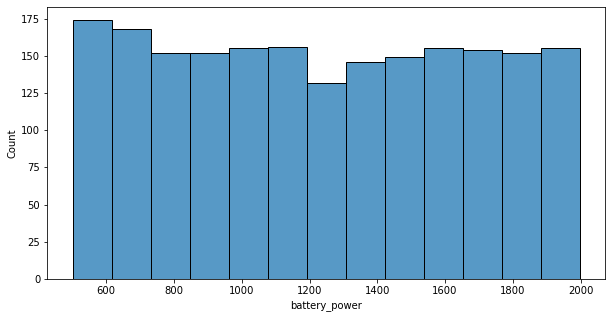

In [13]:
#Plot battery_power variable
plt.figure(figsize=(10,5))
sns.histplot(data['battery_power'])
plt.show()

<ol>
    <li>Minimum battery MAh 500.
    <li>Maximum battery MAh 2000.
    <li>Most data have between 500 to 620.
</ol>

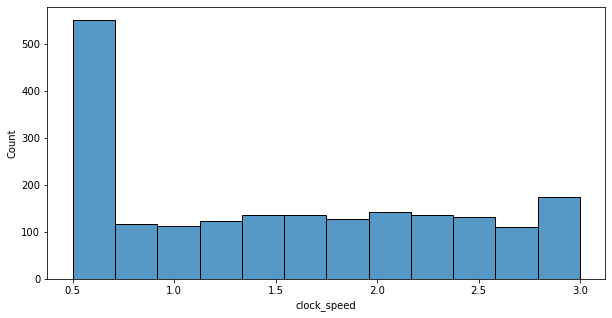

In [14]:
#Plot clock_speed variable
plt.figure(figsize=(10,5))
sns.histplot(data['clock_speed'])
plt.show()

<ol>
    <li>Range of clock speed 0.5 to 3.0.
    <li>Most data have Clock speed between 0.5 to 0.7.
</ol>

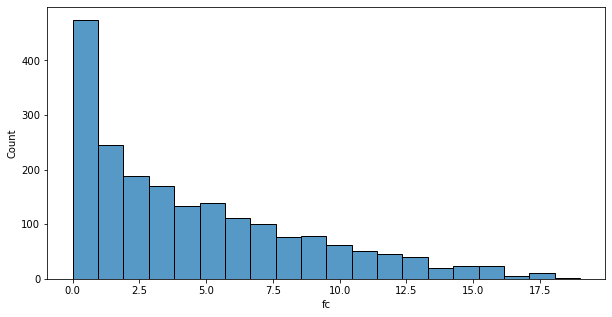

In [15]:
#Plot fc variable
plt.figure(figsize=(10,5))
sns.histplot(data['fc'])
plt.show()

* In fc feture most data have 0 mega pixel but it not possible that camera have 0 mega pixe

* Max mega pixel is 19

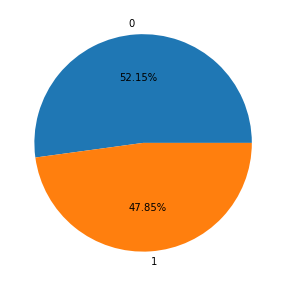

In [16]:
#Plot four_g variable
fig = plt.figure(figsize=(15,5))
plt.pie(data["four_g"].value_counts(),autopct="%0.2f%%",labels=data["four_g"].unique())
plt.show()

* 52.15% phone have no 4G.
* 47.85% phone have 4G.

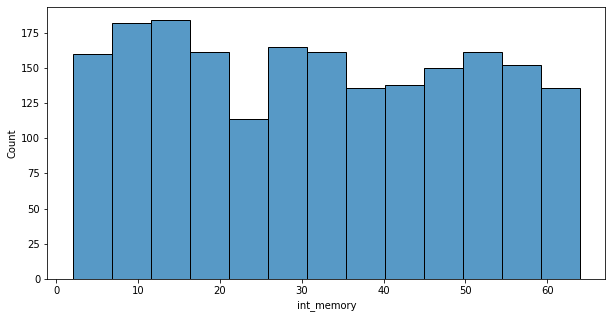

In [17]:
#Plot int_memory variable
plt.figure(figsize=(10,5))
sns.histplot(data['int_memory'])
plt.show()

*  Lowest internal memory is 2 and highest internal memory is 64.

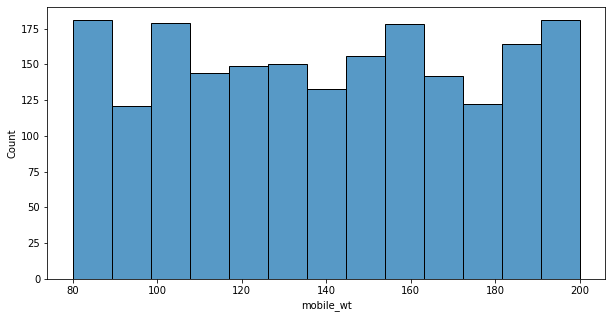

In [18]:
#Plot mobile_wt variable
plt.figure(figsize=(10,5))
sns.histplot(data['mobile_wt'])
plt.show()

* data spread between 80 to 200 weight

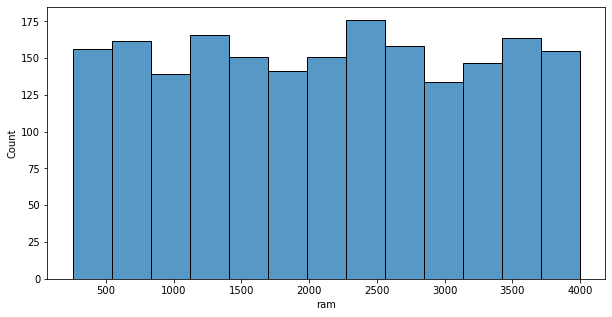

In [19]:
#Plot ram variable
plt.figure(figsize=(10,5))
sns.histplot(data['ram'])
plt.show()

* Lowest ram is 250 MB and highest ram is 4000 MB 

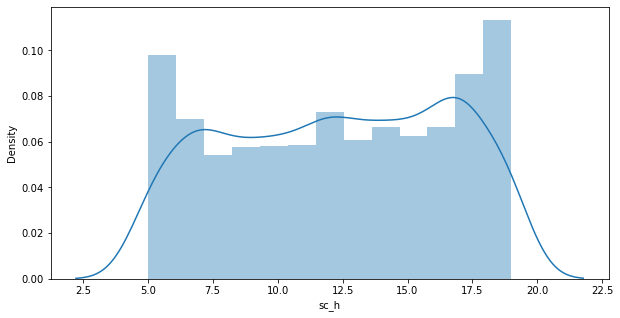

In [20]:
#Plot sc_h variable
plt.figure(figsize=(10,5))
sns.distplot(data['sc_h'])
plt.show()

* Highest phone  height is 19 cm

* Most phone height is between  17 to 19 cm

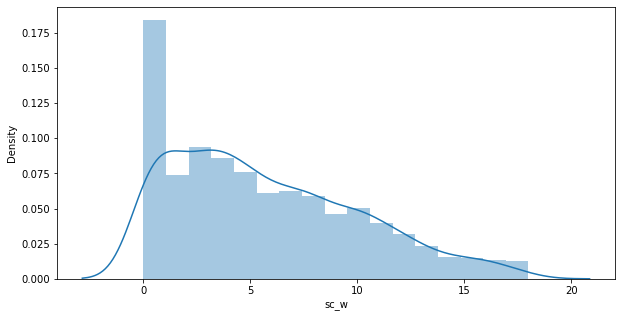

In [21]:
#Plot sc_w variable
plt.figure(figsize=(10,5))
sns.distplot(data['sc_w'])
plt.show()

* In sc_w feture most data have 0 width but it not possible that screen have 0 width.

* data spread is not normalised.

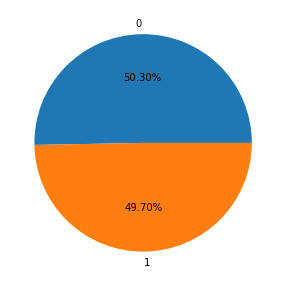

In [22]:
#Plot touch_screen variable
fig = plt.figure(figsize=(15,5))
plt.pie(data["touch_screen"].value_counts(),autopct="%0.2f%%",labels=data["touch_screen"].unique())
plt.show()

* 50.30% phone not have touch_screen  and 49.70% phone have touch_screen. 

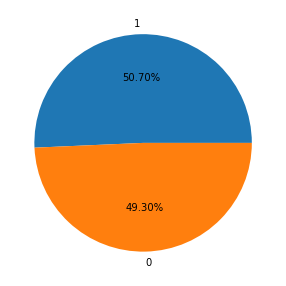

In [23]:
#Plot wifi variable
fig = plt.figure(figsize=(15,5))
plt.pie(data["wifi"].value_counts(),autopct="%0.2f%%",labels=data["wifi"].unique())
plt.show()

* 50.70% phone have wifi and 49.30% phone have not wifi. 

### Bivariate Multivariate Analysis

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

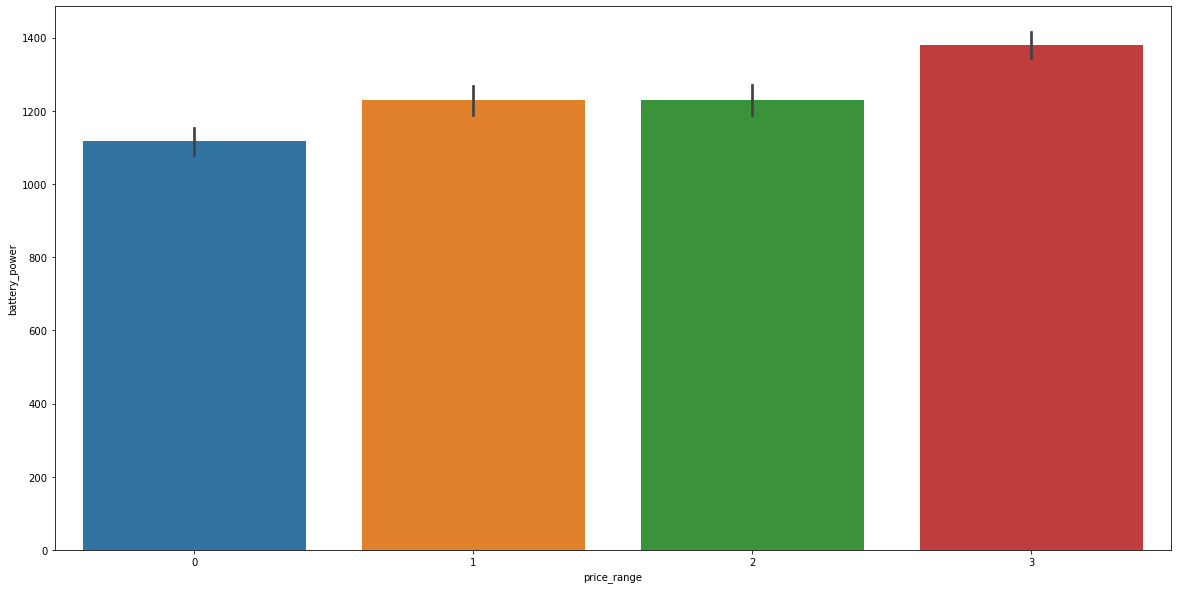

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(x='price_range',y='battery_power',data=data) 

* If battery power is increased price is also increase.

* positive correlation exist between battery power and price range.

<AxesSubplot:xlabel='n_cores', ylabel='int_memory'>

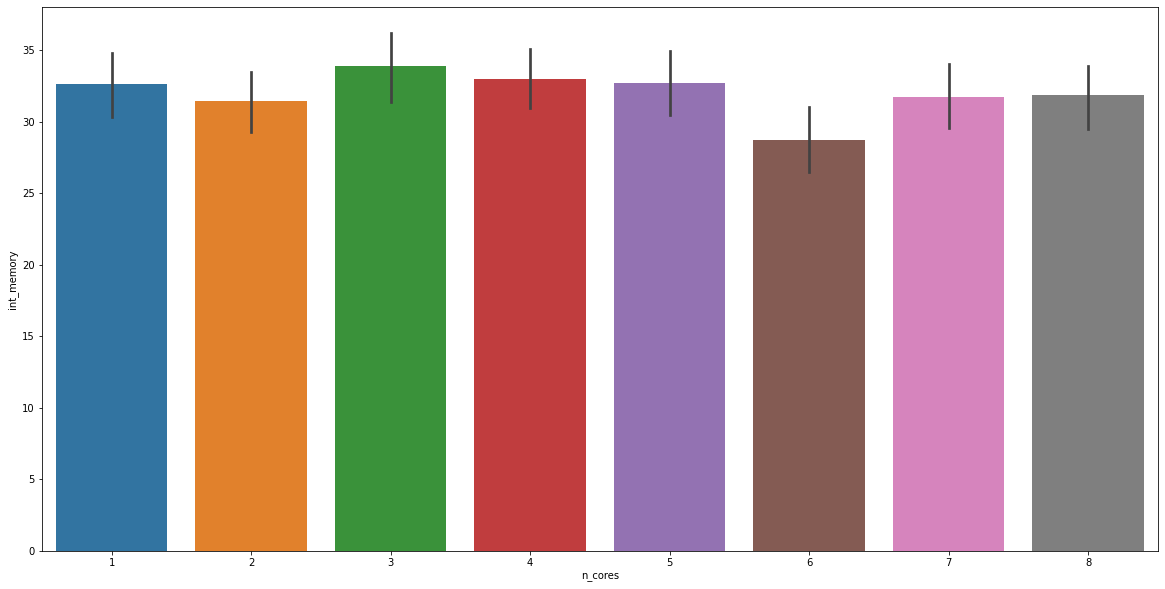

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='n_cores',y='int_memory',data=data) 

* There is no found relation between ncores and internal memory.

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

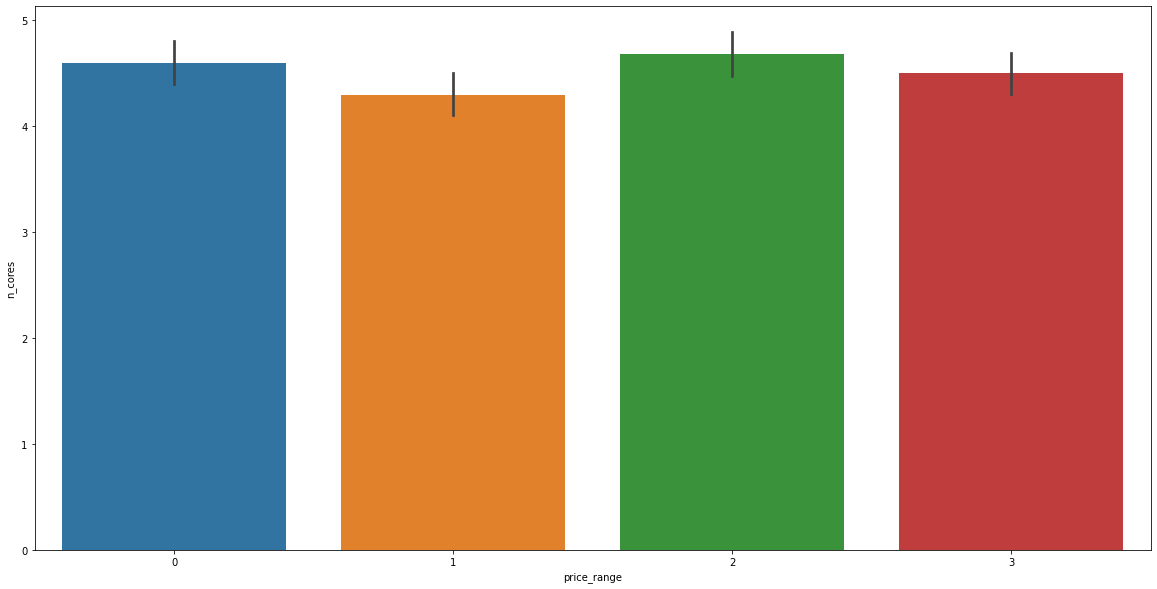

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x='price_range',y='n_cores',data=data) 

* There is no found relation between ncores and price_range.

<AxesSubplot:xlabel='price_range', ylabel='dual_sim'>

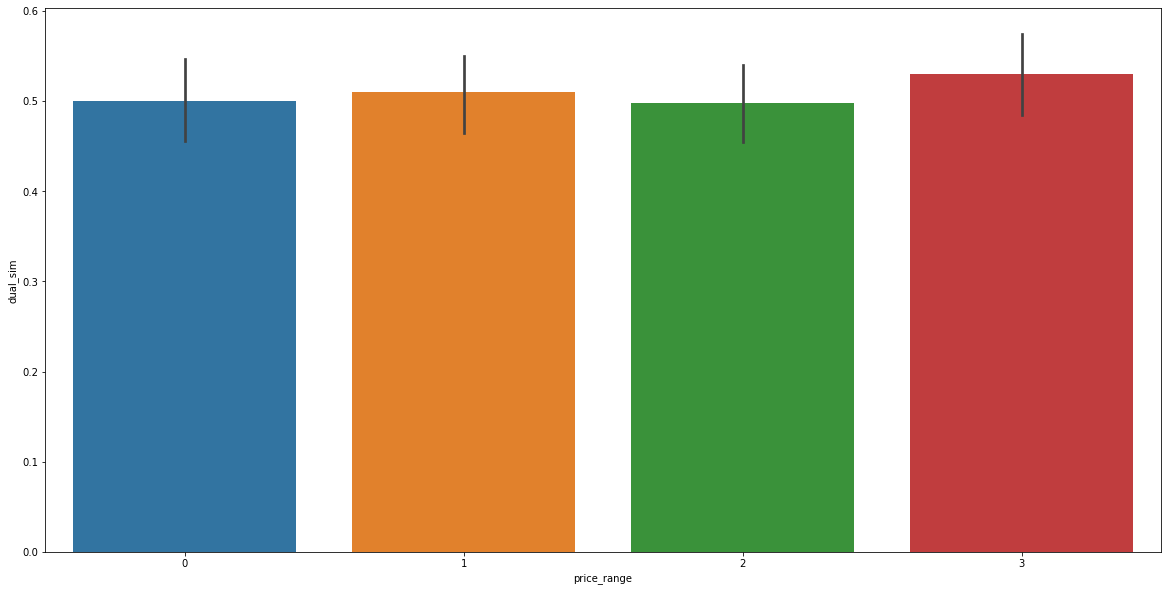

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='price_range',y='dual_sim',data=data) 

<AxesSubplot:xlabel='touch_screen', ylabel='price_range'>

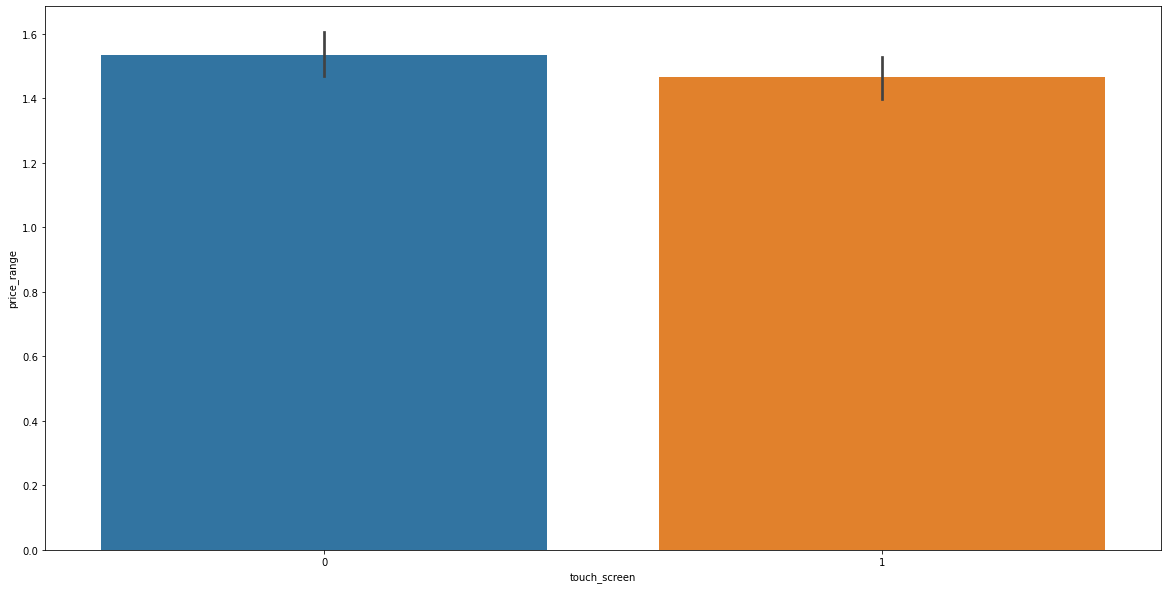

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(y='price_range',x='touch_screen',data=data) 

* If mobile phone not have touch screen price is high as compared to touchscreen phone.

<AxesSubplot:xlabel='sc_h', ylabel='sc_w'>

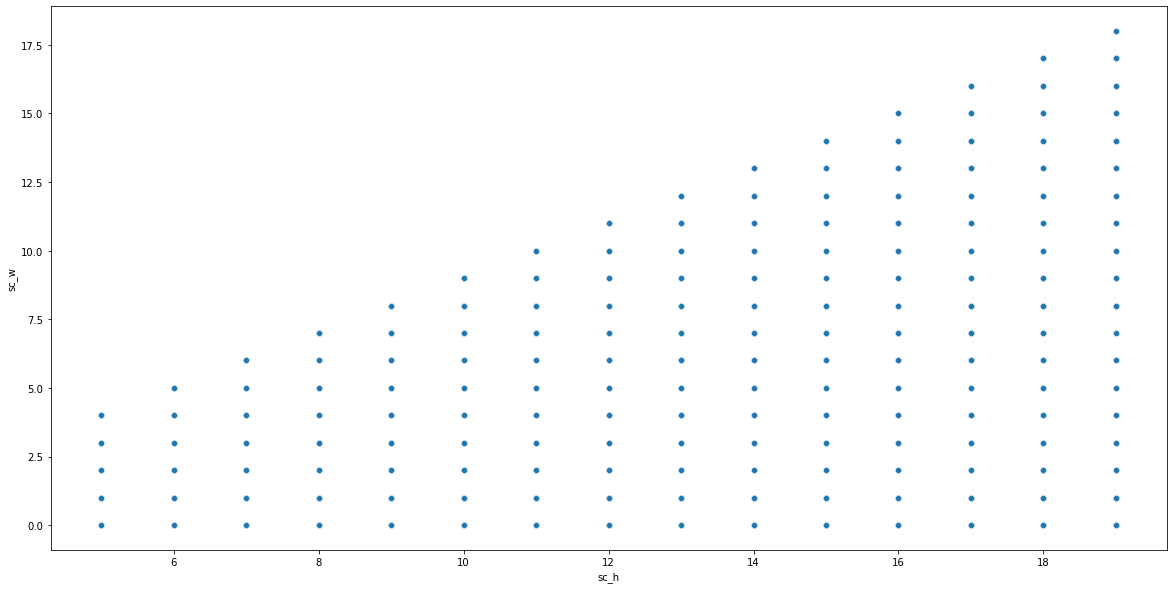

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(y='sc_w',x='sc_h',data=data) 

* If screen height is increased also increase screen width.

* There is found positive correlation between screen height and screen width

<AxesSubplot:xlabel='sc_h', ylabel='sc_w'>

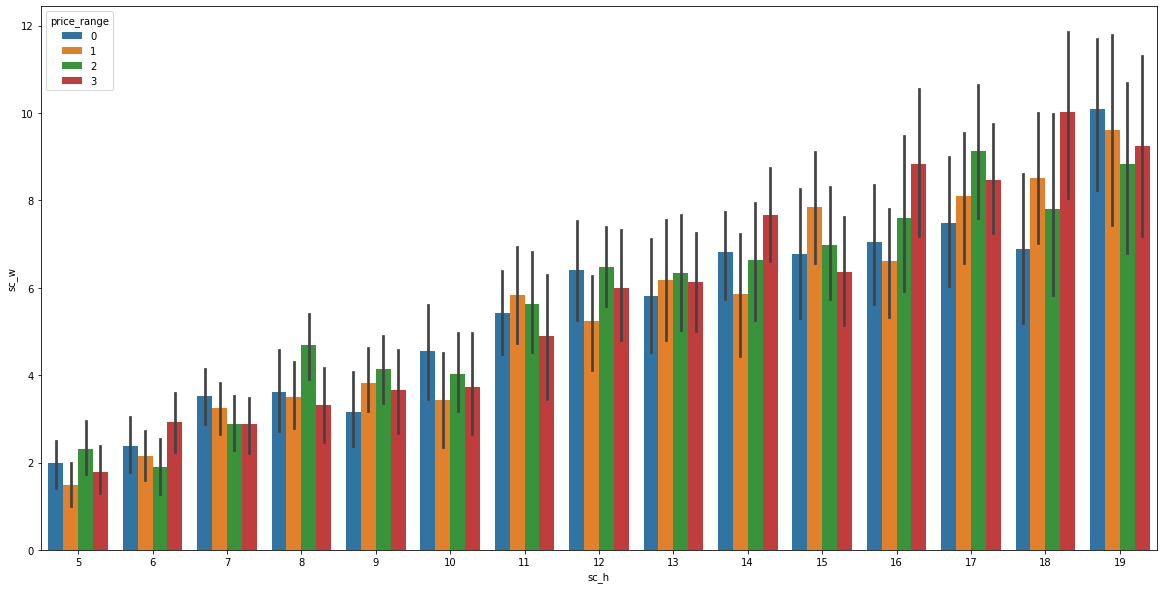

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(y='sc_w',x='sc_h',data=data,hue="price_range") 

* If screen height and width increase price is also increase.

* There is found positive correlation between screen height and  price or  screen width and price

<AxesSubplot:xlabel='price_range', ylabel='pc'>

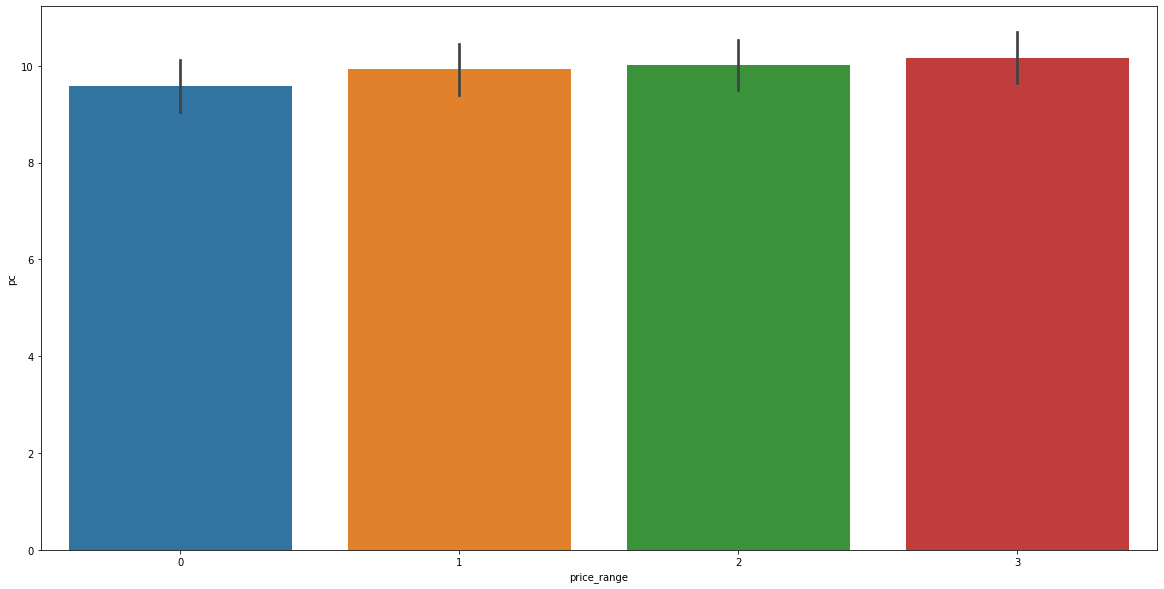

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(y='pc',x='price_range',data=data) 

* If primary camera mega pixel is increased than prices also increase.

* There is found positive correlation between primary camera mega pixel and prize range.

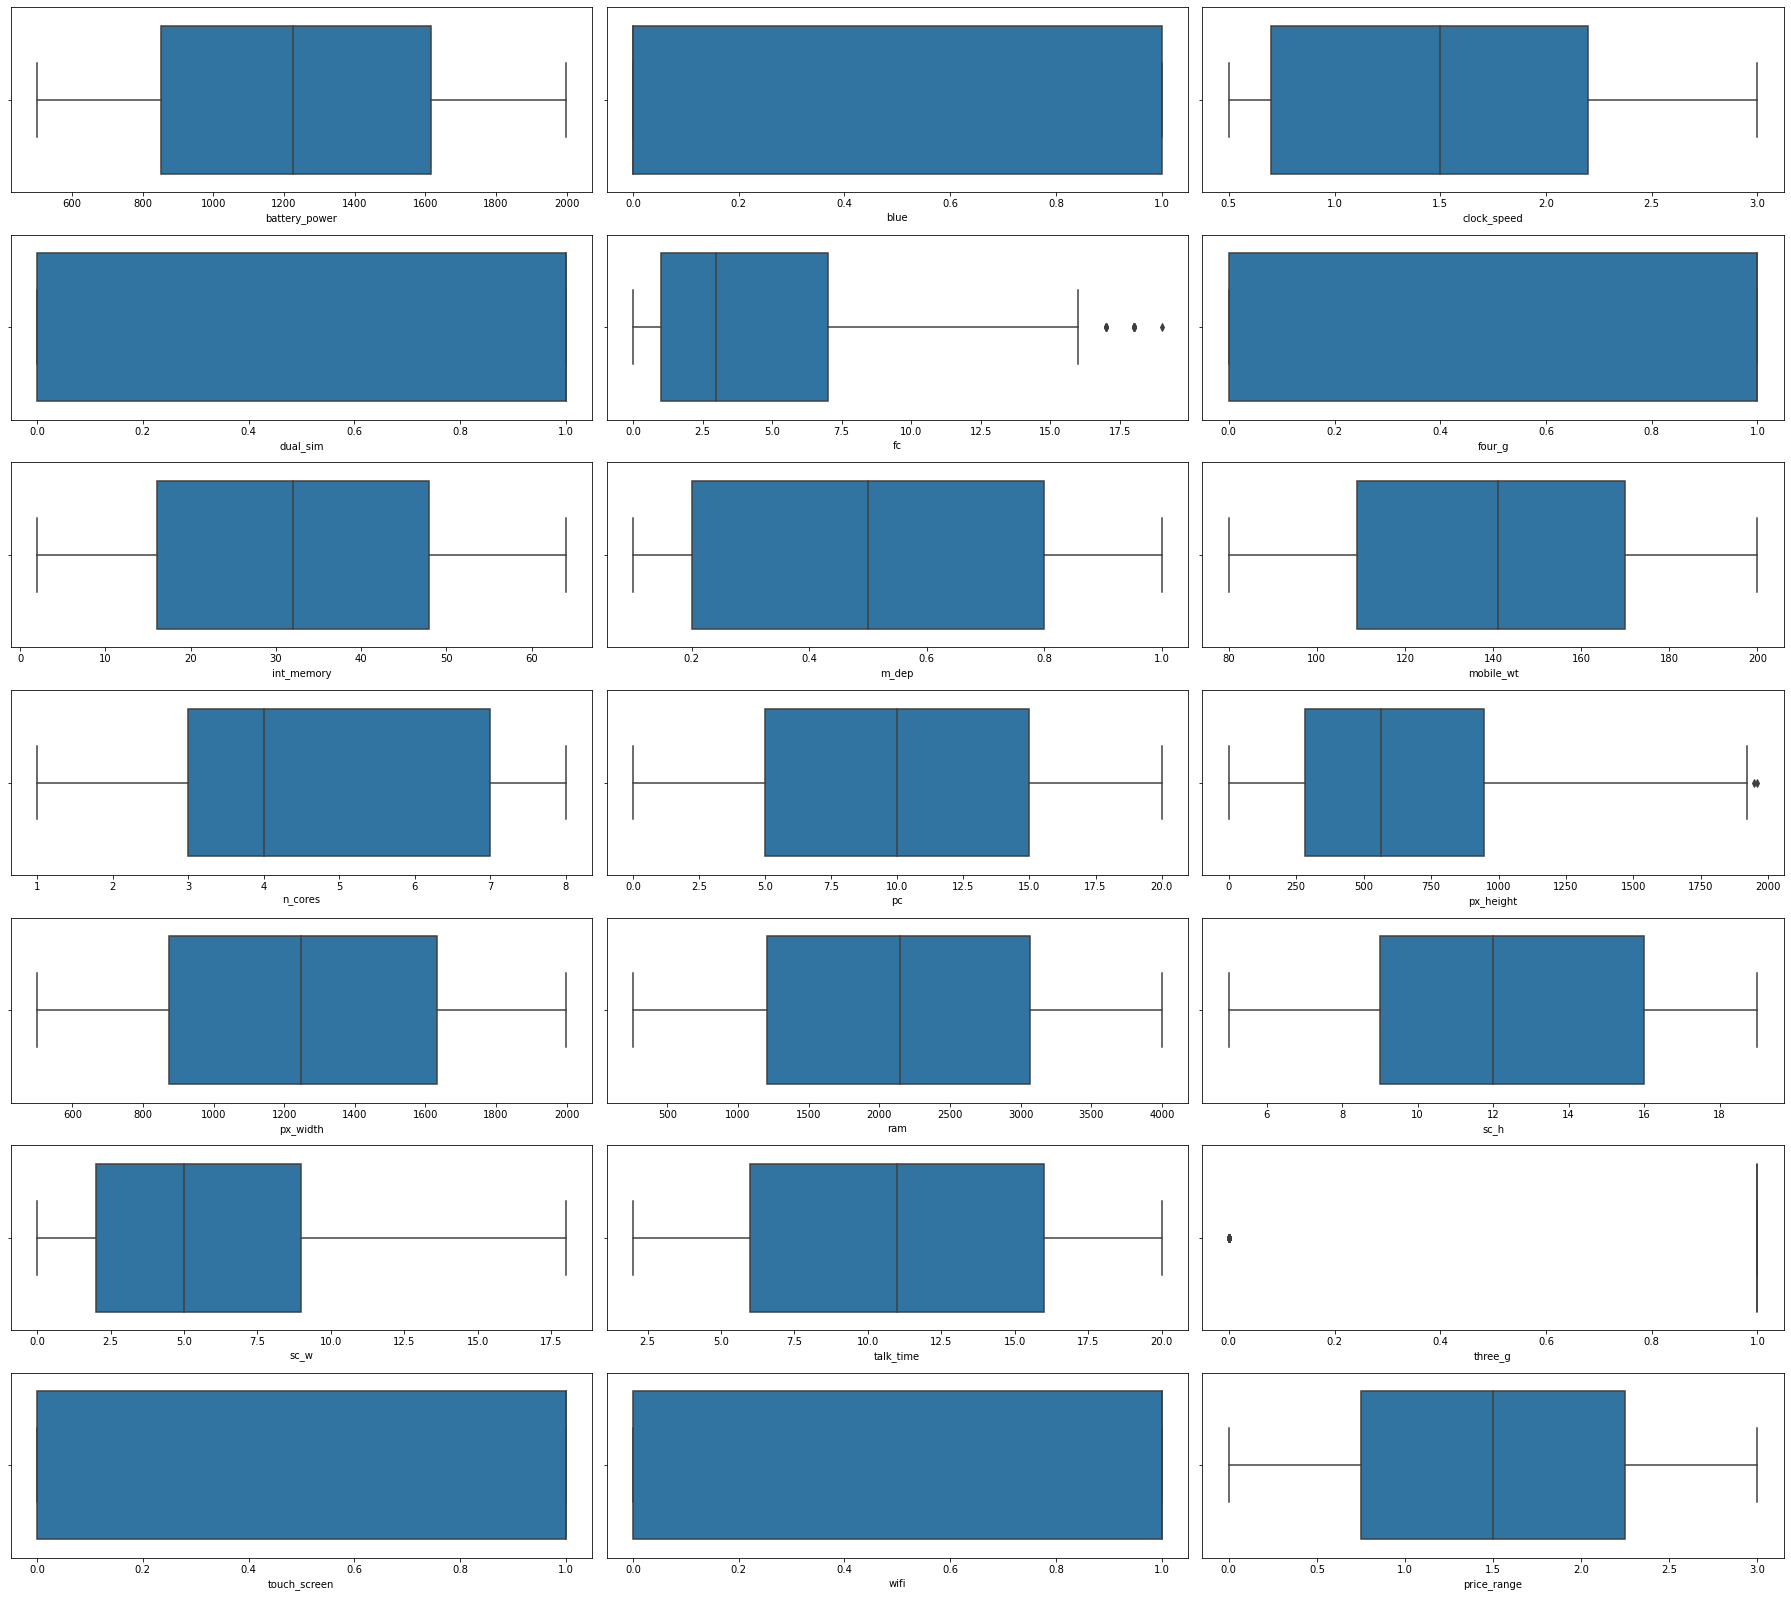

In [32]:
# box plot
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=24:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

* In fc and px_height and three_g feature have outlair.

<AxesSubplot:xlabel='px_height', ylabel='Density'>

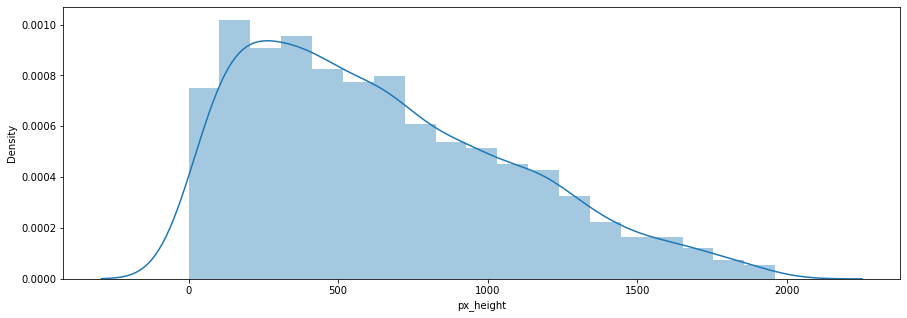

In [33]:
plt.figure(figsize=(15,5))
sns.distplot(data['px_height'])

* PX_height  is not follow normal distribution.

<AxesSubplot:xlabel='fc', ylabel='Density'>

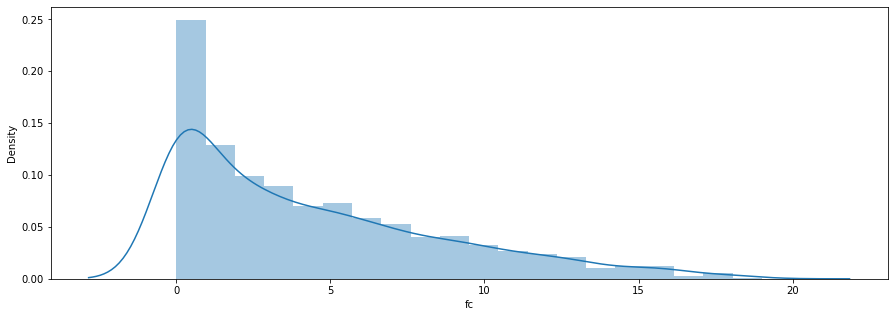

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(data['fc'])

* fc is not follow normal distribution.

# EDA

In [35]:
#checking null value
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

* no null value present in data set.

###  Handling Outlier

#####  IQR Technique.

In [36]:
# Interquartile range (IQR)  of Fc Feature
IQR = stats.iqr(data.fc, interpolation = 'midpoint') 
IQR

6.0

In [37]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.fc.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.fc.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR
print(min_limit)
max_limit=Q3 +1.5*IQR
print(max_limit)

-8.0
16.0


In [38]:
## filetring the data
data.loc[data['fc'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


In [39]:
## imputing the outliers as the count is high
data.loc[data['fc'] > max_limit,'fc']=np.median(data.fc)

In [40]:
#checking values updated or not
data.loc[data['fc'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<AxesSubplot:xlabel='fc'>

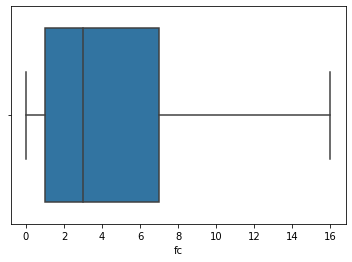

In [41]:
#Checking using Graph
sns.boxplot('fc',data=data)

In [42]:
# Interquartile range (IQR)  of px_height Feature
IQR = stats.iqr(data.px_height, interpolation = 'midpoint') 
IQR

665.0

In [43]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.px_height.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.px_height.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR
print(min_limit)
max_limit=Q3 +1.5*IQR
print(max_limit)

-714.75
1944.75


In [44]:
## filetring the data
data.loc[data['px_height'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2


In [45]:
## imputing median value becuase px_height is not noraml distribution
data.loc[data['px_height'] > max_limit,'px_height']=np.median(data.px_height)

In [46]:
#checking values updated or not
data.loc[data['fc'] > max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<AxesSubplot:xlabel='px_height'>

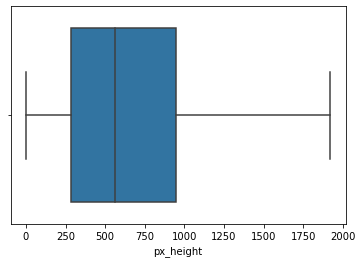

In [47]:
#Checking using Graph
sns.boxplot('px_height',data=data)

#### Above we see that sc_w have same  0 value but is not possible. Lets handel it.

In [48]:
#Putting medien on 0 value.
data.loc[data['sc_w']==0,'sc_w']=np.median(data['sc_w'])

####  Above we see that px_height have same 0 value but is not possible. Lets handel it.

In [49]:
#Putting medien on 0 value.
data.loc[data['px_height']==0,'px_height']=np.median(data['px_height'])

### Feature Selection

In [50]:
x1=data.iloc[:,:-1]
y1=data['price_range']

In [51]:
model = ExtraTreesClassifier()
model.fit(x1,y1)

ExtraTreesClassifier()

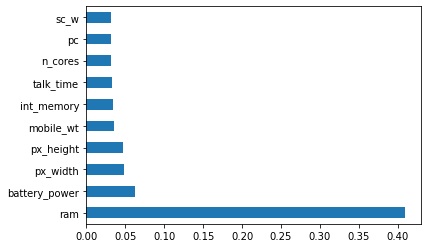

In [52]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [53]:
x1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [54]:
drop=['blue','dual_sim','fc','four_g','n_cores','pc','sc_w','three_g','touch_screen','wifi']

In [55]:
#top 10 feature
x2=x1.drop(drop,axis=1)

## Train and Test Split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.33,random_state=42)

In [57]:
#Checking X_train
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
81,999,0,2.9,1,11,1,64,0.2,199,4,19,1397,1616,2593,14,11,16,1,1,0
915,1265,0,0.6,1,4,1,49,0.5,90,1,5,275,687,1518,16,11,8,1,0,1
1018,1000,1,0.5,0,12,0,63,0.7,179,8,18,1537,1761,3744,11,1,7,0,0,1
380,1874,1,2.7,1,10,0,8,0.9,166,7,13,964,1233,1246,8,1,2,0,0,1
1029,1658,1,1.4,1,0,1,38,0.3,159,5,0,51,739,2609,12,11,19,1,0,0


In [58]:
#Checking X_test
x_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,1646,0,2.5,0,3,1,25,0.6,200,2,5,211,1608,686,8,6,11,1,1,0
353,1182,0,0.5,0,7,1,8,0.5,138,8,16,275,986,2563,19,17,19,1,0,0
1333,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0
905,989,1,2.0,0,4,0,17,0.2,166,3,19,256,1394,3892,18,7,19,1,1,0
1289,615,1,0.5,1,7,0,58,0.5,130,5,8,1021,1958,1906,14,5,5,1,0,0


In [59]:
#Checking y_train
y_train.head()

81      2
915     1
1018    3
380     1
1029    2
Name: price_range, dtype: int64

In [60]:
#Checking y_test
y_test.head()

1860    0
353     2
1333    1
905     3
1289    1
Name: price_range, dtype: int64

#####  After doing feature selection

In [61]:
x_train_f,x_test_f,y_train_f,y_test_f=train_test_split(x2,y1,test_size=0.33,random_state=42)

In [62]:
#Checking X_train
x_train_f.head()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,talk_time
81,999,2.9,64,0.2,199,1397,1616,2593,14,16
915,1265,0.6,49,0.5,90,275,687,1518,16,8
1018,1000,0.5,63,0.7,179,1537,1761,3744,11,7
380,1874,2.7,8,0.9,166,964,1233,1246,8,2
1029,1658,1.4,38,0.3,159,51,739,2609,12,19


In [63]:
#Checking X_test
x_test_f.head()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,talk_time
1860,1646,2.5,25,0.6,200,211,1608,686,8,11
353,1182,0.5,8,0.5,138,275,986,2563,19,19
1333,1972,2.9,14,0.4,196,293,952,1316,8,8
905,989,2.0,17,0.2,166,256,1394,3892,18,19
1289,615,0.5,58,0.5,130,1021,1958,1906,14,5


In [64]:
#Checking y_train
y_train_f.head()

81      2
915     1
1018    3
380     1
1029    2
Name: price_range, dtype: int64

In [65]:
#Checking y_test
y_test_f.head()

1860    0
353     2
1333    1
905     3
1289    1
Name: price_range, dtype: int64

# Scaling

In [66]:
scaler=StandardScaler()

In [67]:
x_train_s=scaler.fit_transform(x_train)

In [68]:
x_test_s=scaler.transform(x_test)

In [69]:
minscaler=MinMaxScaler()

<IPython.core.display.Javascript object>

In [70]:
x_train_m=minscaler.fit_transform(x_train)

In [71]:
x_test_m=minscaler.transform(x_test)

#####  After feature selection

In [72]:
scaler=StandardScaler()

In [73]:
x_train_s_f=scaler.fit_transform(x_train_f)

In [74]:
x_test_s_f=scaler.transform(x_test_f)

In [75]:
minscaler=MinMaxScaler()

<IPython.core.display.Javascript object>

In [76]:
x_train_m_f=minscaler.fit_transform(x_train_f)

In [77]:
x_test_m_f=minscaler.transform(x_test_f)

# Model Building

###### 1. KNN Algorithm

In [78]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
    # if predicted value is not equal to actual value, returns true (which is taken as 1) else false(0). 
    # Adds all the value and takes mean of it. So for each k-value, gets the mean of error.
    #print(np.mean(pred_i != y_test))

In [79]:
error_rate

[0.09242424242424242,
 0.09545454545454546,
 0.08484848484848485,
 0.0893939393939394,
 0.0803030303030303,
 0.07575757575757576,
 0.07272727272727272,
 0.07121212121212121,
 0.06515151515151515,
 0.06818181818181818]

Text(0, 0.5, 'Error Rate')

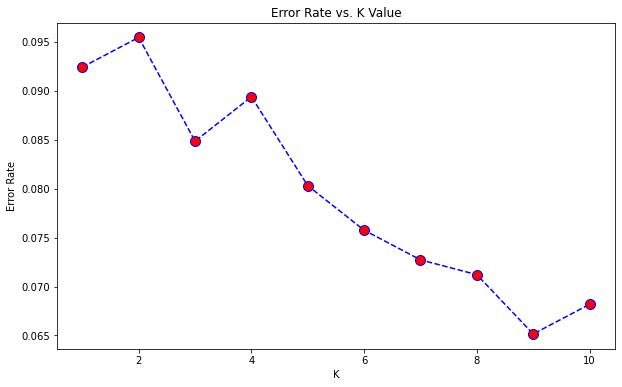

In [80]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [81]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [82]:
#Predict test data
y_pred_knn_t = knn.predict(x_test)

In [83]:
#accuracy of test data
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn_t))

The accuracy score is :  0.9287878787878788


#####  After feature selection

In [84]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate_f=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_s_f,y_train_f)
    pred_i=knn.predict(x_test_s_f)
    error_rate_f.append(np.mean(pred_i!=y_test_f))
    # if predicted value is not equal to actual value, returns true (which is taken as 1) else false(0). 
    # Adds all the value and takes mean of it. So for each k-value, gets the mean of error.
    #print(np.mean(pred_i != y_test))

In [85]:
error_rate_f

[0.39545454545454545,
 0.403030303030303,
 0.3924242424242424,
 0.33484848484848484,
 0.3424242424242424,
 0.34545454545454546,
 0.3515151515151515,
 0.33484848484848484,
 0.3242424242424242,
 0.34393939393939393]

Text(0, 0.5, 'Error Rate')

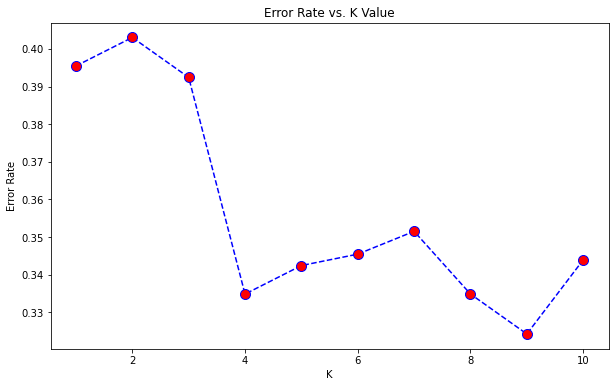

In [86]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate_f,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [87]:
# let's fit the data into KNN model and see how well it performs:
knn_f = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_s_f,y_train)

KNeighborsClassifier(n_neighbors=10)

In [88]:
#Predict test data
y_pred_knn_t_f = knn.predict(x_test_s_f)

In [89]:
#accuracy of test data
print("The accuracy score is : ", accuracy_score(y_test,y_pred_knn_t_f))

The accuracy score is :  0.656060606060606


* As we can see that before feature selection accuracy_score .93 or after .67 

* That's why we can not apply feature selection or scaling

### 2. Decision Trees.

In [90]:
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x_train,y_train)#training the model

DecisionTreeClassifier()

In [91]:
y_test_dt_predict=dt.predict(x_test)#predicting testing data to check training performance 
y_test_dt_predict

array([0, 2, 1, 3, 1, 2, 2, 0, 2, 2, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 2, 2, 3, 2, 0, 0, 0, 3, 0, 1, 1, 2, 1, 3, 0, 2, 3, 1, 0,
       3, 2, 1, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 2, 2, 2, 2, 0, 1, 3, 0, 1, 3, 2, 2, 3, 2, 1, 0, 2, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 2, 3, 0, 2, 1, 3, 2, 1, 3, 3, 1, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 1, 0, 2, 3, 0, 2, 3, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 0, 0, 3, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 2, 2, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 3, 1, 1,
       3, 2, 3, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 3, 2, 1, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 1, 2, 0, 2, 3, 2, 2, 2, 0, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 3, 3, 3, 3, 0, 0, 0, 1, 3, 3,

In [92]:
acc_test_dt=accuracy_score(y_test,y_test_dt_predict)#checking accuracy
acc_test_dt

0.8166666666666667

In [93]:
y_train_dt_predict=dt.predict(x_train)#predicting traing data to check training performance 
acc_train_dt=accuracy_score(y_train,y_train_dt_predict)#checking accuracy
acc_train_dt

1.0

* Hyperparameter tuning

In [94]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [95]:
dt1=DecisionTreeClassifier(criterion='gini',min_samples_leaf= 1,min_samples_split=2,splitter='best')

In [96]:
dt1.fit(x_train,y_train)#traing model with best parameter

DecisionTreeClassifier()

In [97]:
y_pre_dt_p=dt1.predict(x_test)#predicting

In [98]:
acc_test_dt_h=accuracy_score(y_test,y_pre_dt_p)#checking accuracy
acc_test_dt_h

0.8181818181818182

In [99]:
y_pre_dt_p=dt1.predict(x_train)#predicting
acc_train_dt_h=accuracy_score(y_train,y_pre_dt_p)#checking accuracy
acc_train_dt_h

1.0

* before hyper parameter tuan test accuracy is .81 and train accuracy is 1.0 after tuaning accuracy is same.

* we can say that model is overfitting becuase train accuracy is high as compare to test.

###  3. Random Forest

In [100]:
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(x_train,y_train)#training the data

RandomForestClassifier()

In [101]:
y_predict=rf_clf.predict(x_test)#testing

In [102]:
accuracy_rf=accuracy_score(y_test,y_predict)
accuracy_rf

0.8803030303030303

In [103]:
y_predict_train=rf_clf.predict(x_train)#testing

In [104]:
accuracy_rf=accuracy_score(y_train,y_predict_train)
accuracy_rf

1.0

In [105]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_cv.fit(x_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


In [106]:
 rf_best_params

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [107]:
rf_clf2 = RandomForestClassifier(**rf_best_params)#passing best parameter to randomforest
rf_clf2.fit(x_train,y_train)#training 
y_predict_rf=rf_clf2.predict(x_test)#testing

In [108]:
print(accuracy_score(y_test,y_predict_rf))

0.8818181818181818


In [109]:
y_predict_rf_train=rf_clf2.predict(x_train)#testing

In [110]:
print(accuracy_score(y_train,y_predict_rf_train))

1.0


###   XGBOOST

In [111]:
xgb_r= XGBClassifier() ## object creation
xgb_r.fit(x_train,y_train)# fitting the data
y_hat_xg=xgb_r.predict(x_test)#predicting the price

In [112]:
acc_test_xg=accuracy_score(y_test,y_hat_xg)#checking accuracy
acc_test_xg

0.9045454545454545

In [113]:
print(classification_report(y_test,y_hat_xg))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       169
           1       0.88      0.89      0.88       162
           2       0.86      0.86      0.86       162
           3       0.93      0.92      0.92       167

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660



In [114]:
y_hat_xg_train=xgb_r.predict(x_train)#predicting the price

In [115]:
acc_test_xg_train=accuracy_score(y_train,y_hat_xg_train)#checking accuracy
acc_test_xg_train

1.0

*  Hyper parameter tunning in XG boost 

In [117]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # no. of models 
max_depth = [3,4,5,6]#The maximum depth of a tree
learning_rate=[0.1,0.2,0.3] #Typical final values to be used: 0.01-0.3
gamma=[0, 1, 2, 3, 4] # Gamma specifies the minimum loss reduction required to make a split. It controls the overfitting. 
                      # Ranges from 0 to ∞.
subsample=[0.5,0.7,1] # no of samples to be used. For eg: 0.5 -> half of the training data (50%) used to train each tree.
                     #Lower values make the algorithm more conservative and prevents overfitting but too 
                     #small values might lead to under-fitting.Typical values: 0.5-1. Range: (0,1)
colsample_bytree=[0.5,0.7,1]#Denotes the fraction of columns to be randomly samples for each tree. Ranges from 0 to 1
                          # ie., % of features should be taken for each tree

params={
    'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators,
     'gamma':gamma, 'subsample':subsample, 'colsample_bytree':colsample_bytree
}

XGB=XGBClassifier(random_state=42)

rcv= RandomizedSearchCV(XGB, scoring='r2',param_distributions=params, n_iter=100, cv=3, 
                                random_state=42, n_jobs=-1)
                              
                        
rcv.fit(x_train, y_train) ##training data on randomsearch cv.
cv_best_params = rcv.best_params_ ##it will give you best parameters 
print(f"Best paramters: {cv_best_params}")  ##printing  best parameters

Best paramters: {'subsample': 0.5, 'n_estimators': 1200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1}


In [118]:
cv_best_params

{'subsample': 0.5,
 'n_estimators': 1200,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 1,
 'colsample_bytree': 1}

In [120]:
XGB2=XGBClassifier(**cv_best_params)
XGB2.fit(x_train, y_train)#training 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [122]:
y_predict_test_h_xg=XGB2.predict(x_test)#testing

In [124]:
acc_test_xg_h_test=accuracy_score(y_test,y_predict_test_h_xg)#checking accuracy
acc_test_xg_h_test

0.9166666666666666

In [127]:
y_predict_train_h_xg=XGB2.predict(x_train)#train testing

In [128]:
acc_test_xg_h_train=accuracy_score(y_train,y_predict_train_h_xg)#checking accuracy
acc_test_xg_h_train

0.9992537313432835

### Naive Bayes

In [132]:
## model object creation
nb=BernoulliNB(alpha=0.01) 

## fitting the model
nb.fit(x_train,y_train)

## getting the prediction
y_hat_nb=nb.predict(x_test) 

In [133]:
acc_test_nb=accuracy_score(y_test,y_hat_nb)#checking accuracy
acc_test_nb

0.22424242424242424

In [135]:
y_hat_nb_train=nb.predict(x_train) 

In [136]:
acc_train_nb=accuracy_score(y_train,y_hat_nb_train)#checking accuracy
acc_train_nb

0.28134328358208954

###  SVM

In [166]:
# instad of poly linear give high accuracy
svclassifier = SVC(kernel="linear")
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [167]:
# Predict output for X_test

y_hat_svm=svclassifier.predict(x_test)

In [168]:
acc_svm=accuracy_score(y_test,y_hat_svm)
acc_svm

0.9757575757575757

In [169]:
# Predict output for X_train

y_hat_svm_train=svclassifier.predict(x_train)

In [170]:
acc_svm_train=accuracy_score(y_train,y_hat_svm_train)
acc_svm_train

0.994776119402985

*  Hyper parameter tunning in SVM

In [159]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose = 3,scoring='accuracy',cv=3)

#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.253 total time=   0.3s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.251 total time=   0.3s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.251 total time=   0.3s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.255 total time=   0.3s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.251 total time=   0.3s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.251 total time=   0.3s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.253 total time=   0.3s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.251 total time=   0.3s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.251 total time=   0.3s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.253 total time=   0.3s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.251 total time=   0.3s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy', verbose=3)

In [160]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [171]:
clf=SVC(C=10, gamma=.0001,random_state=42) ##0.1

In [172]:
clf.fit(x_train,y_train)

SVC(C=10, gamma=0.0001, random_state=42)

In [173]:
y_clf_svm=clf.predict(x_test)

In [174]:
acc_svm_h=accuracy_score(y_test,y_clf_svm)

In [175]:
acc_svm_h

0.7848484848484848

In [176]:
y_clf_svm_train=clf.predict(x_train)

In [177]:
acc_svm_h_train=accuracy_score(y_test,y_clf_svm)

In [178]:
acc_svm_h_train

0.7848484848484848

* before hyper parameter tunning accuracy is best